# Итоговая работа.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
#Вариант 1
from  sklearn.metrics.pairwise import pairwise_distances
user_similarities = pairwise_distances(raitings, metric='cosine') #расчет косинусного сходства
for i in range(user_similarities.shape[0]):
    user_similarities[i,i] = 1 # сделать расстояние пользователей до самих себя максимальным
user_similarities.argmin(0) + 1 

array([ 9,  5, 10, 10,  9, 10,  4,  6,  1,  3], dtype=int64)

In [5]:
#Вариант 2
from  sklearn.metrics.pairwise import pairwise_distances
user_similarities = pairwise_distances(raitings, metric='cosine') #расчет косинусного сходства
for user_idx, user in enumerate(user_similarities):#находим самого похожего пользователя, исключая его самого
    sim_user = min(user, key=lambda x:(x==0, x))
    print(user_idx + 1,user.tolist().index(sim_user) + 1)

1 9
2 5
3 10
4 10
5 9
6 10
7 4
8 6
9 1
10 3


In [6]:
# Сжатие размерности через метод главных компонент
from sklearn.decomposition import PCA
pca = PCA(n_components = 10) #Максимальное кол-во компонент при использовании PCA
XPCAreduced = pca.fit_transform(raitings)

In [7]:
#доля объясненной дисперсии
pca.explained_variance_ratio_

array([2.53737476e-01, 1.97020901e-01, 1.41133058e-01, 1.29563710e-01,
       1.12899283e-01, 8.11280222e-02, 4.50097908e-02, 2.57680477e-02,
       1.37397111e-02, 6.15064401e-33])

Text(0, 0.5, 'Общая объясненная дисперсия')

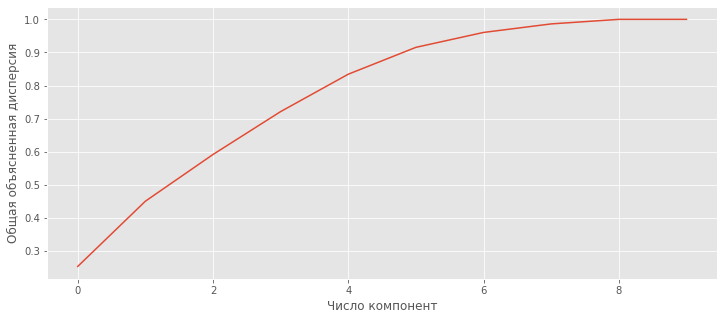

In [8]:
#Нарисуем график доли объясненной дисперсии
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Общая объясненная дисперсия')

In [9]:
#Получается, что 5 признаков дают 0,9 дисперсии исходных данных, т.е.мы можем взять 5 компонент
# и снизить размерность без значительной потери данных
pca_5 = PCA(n_components = 5) #Максимальное кол-во компонент при использовании PCA
XPCAreduced = pca_5.fit_transform(raitings)
XPCAreduced

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).


In [10]:
# на python
from scipy.misc import derivative
from math import sin,cos,tan
def f(x): #значение первой производной
    return tan(sin(x) + cos(2*x + 3))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

In [11]:
# руками
#(tan(sin(x) + cos(2*x + 3))**2)' = 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
x = 1
diff = 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
diff

55.385917635337854


## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [12]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [13]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [14]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

     fun: 11.842823460003617
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 61
  status: 1
 success: True
       x: array([2.06083332, 0.29355227])


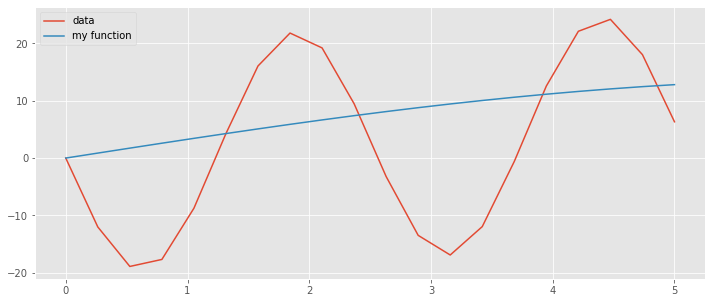

In [15]:
a_0, b_0 = np.random.randn(), np.random.randn()
def g_x(params, x):
    return np.mean(np.abs(f(x,params[0],params[1])-fx))
from scipy.optimize import minimize
result = minimize(g_x, [a_0,b_0], x, method='COBYLA')
print(result)

plt.plot(x, fx, label='data')
best_a, best_b = result['x'].squeeze()
plt.plot(x, f(x, best_a, best_b), label='my function')
plt.legend()
plt.show()

Не попали в глобальный минимум, поэтому будем итерировать попытки, чтобы достичь глобального минимума

Значение ф-ии g_x в min 0.0028358548922586824,Значение параметра a 3.0000596990795017,Значение параметра b-2.499920600067224


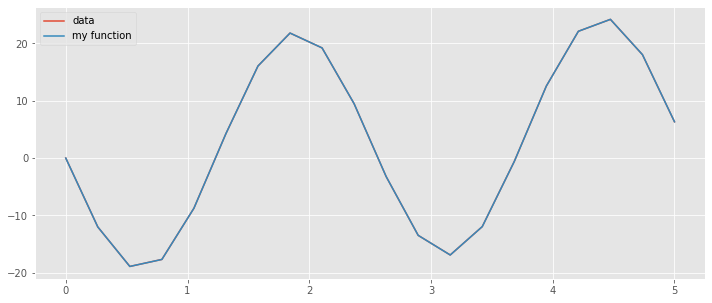

In [34]:
trials = 50 #Кол-во итерации для того, чтобы избежать локального минимума
results = []
a_alls = []
b_alls = []

def g_x(params, x):
    return np.mean(np.abs(f(x,params[0],params[1])-fx))
from scipy.optimize import minimize
for i in range(trials):
    a_0, b_0 = np.random.randn(), np.random.randn()
    result = minimize(g_x, [a_0,b_0], x, method='COBYLA')
    results.append(result['fun']) #Сохраняем значения g_x
    a_alls.append(result['x'][0]) #Сохраняем значение параметра а
    b_alls.append(result['x'][1]) #Сохраняем значения параметра b
best_result = min(results) #Находим минимальное значение ф-ии (как бы минимум из минимумов) - для определения глобального минимума
best_result_index = np.argmin(results)
best_a = a_alls[best_result_index]
best_b = b_alls[best_result_index]
print(f'Значение ф-ии g_x в min {best_result},Значение параметра a {best_a},Значение параметра b{best_b}')
#Строим график 
plt.plot(x, fx, label='data') #Исходные данные
plt.plot(x, f(x, best_a, best_b), label='my function') #Данные ф-ии по полученным параметрам a b
plt.legend()
plt.show()

In [ ]:
Полученные параметры почти идеально описали исходные полученные значения ф-ии.

## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [30]:
#Создаем случайную величину
sv = np.random.randint(low = 1, high = 10, size = 20)
sampling_data = np.random.choice(sv, size=50)
sampling_data

array([1, 9, 1, 3, 6, 4, 7, 2, 5, 5, 6, 1, 4, 6, 2, 5, 7, 6, 1, 6, 3, 9,
       7, 7, 8, 2, 1, 9, 4, 9, 8, 6, 1, 9, 9, 8, 9, 9, 6, 9, 6, 1, 6, 4,
       6, 1, 7, 6, 2, 1])

Text(0.5, 0, '$x$')

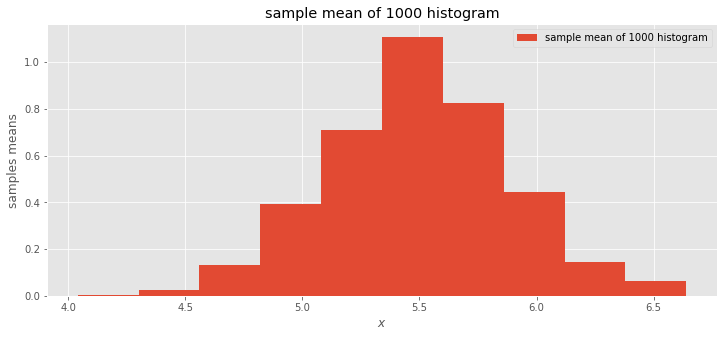

In [31]:
# Параметры запуска: размеры выборок и количество повторов генерации
sample_sizes = 50
sample_count = 1000
sample_mean = [] # Массив для сохранения средних по выборкам
for sample in range(sample_count):
    sampling_data = np.random.choice(sv, size=sample_sizes)
    sample_mean.append(sampling_data.mean()) # Считаем среднее по каждой выборке и добавляем в массив средних
label = 'sample mean of ' + str(sample_count) + ' histogram'
plt.title(label) 
plt.hist(sample_mean,density=True,label = label)
plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

m = np.array([[1, 4],
              [1, 1]])
print(m)

In [32]:
# python
m = np.array([[1, 4], [1, 1]])
print(m)
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

[[1 4]
 [1 1]]
Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


In [79]:
# руками см. фото